In [2]:
import networkx as nx
import networkit as nk
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [6]:
def read_from_txt(path, weighted=False, sep=' '):
    df = pd.read_csv(path, sep=sep, header=None)
    G = nx.Graph()
    if not weighted:
        df.columns = ['Source', 'Target'] + [str(i) for i in range(len(df.columns) - 2)]
        nx.from_pandas_edgelist(df, 'Source', 'Target', create_using=G)
    else:
        df.columns = ['Source', 'Target', 'weight']
        nx.from_pandas_edgelist(df, 'Source', 'Target', weights='weight', create_using=G)
    return G

In [7]:
def read_from_edges(path):
    G = nx.Graph()

    # Read the .edges file and add edges to the graph
    with open(path, 'r') as file:
        for line in file:
            node1, node2 = line.strip().split()[:2]
            G.add_edge(node1, node2)
    file.close()
    return G

In [8]:
def random_switch_graph(G):

    # Convert the NetworkX graph to a Networkit graph
    nk_graph = nk.nxadapter.nx2nk(G)

    # Perform the GlobalCurveball algorithm
    global_curve = nk.randomization.GlobalCurveball(nk_graph, number_of_global_rounds=100)
    global_curve.run()
    H = global_curve.getGraph()

    # Convert the resulting Networkit graph back to NetworkX for visualization
    H_nx = nk.nxadapter.nk2nx(H)
    return H_nx


In [9]:
def plot_degree_dependence(G, log_scale=False, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))
    # Calculate the degrees of all nodes
    degrees = dict(G.degree())

    # Calculate the average neighbor degree for each node
    avg_neighbor_degrees = nx.average_neighbor_degree(G)

    # Create two lists to store the degrees and average neighbor degrees
    node_degrees = list(degrees.values())
    avg_neighbor_degrees_values = list(avg_neighbor_degrees.values())

    # Create a scatter plot to show the dependence
    ax.scatter(node_degrees, avg_neighbor_degrees_values, alpha=0.5)
    ax.set_xlabel('Node Degree')
    ax.set_ylabel('Average Neighbor Degree')
    ax.set_title('Dependence of Average Neighbor Degree and Node Degree')
    if log_scale:
        ax.set_xscale('log')
        ax.set_yscale('log')
    
    return ax  # Return the axes, not the figure
    

In [10]:
def plot_degree_comparison(G, H, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6), ncols=2)

    ax[0].set_title("Original Graph")
    ax[0].hist(list(dict(G.degree()).values()))
    ax[1].set_title("Randomized Graph")
    ax[1].hist(list(dict(H.degree()).values()))
    return ax

In [11]:
def plot_everything_together(G, H, log_scale=False):
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])
    
    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    ax0.set_title('Original Graph')
    ax1.set_title('Randomized Graph')
    
    # Plot the original and randomized graphs
    plot_degree_dependence(G, log_scale=log_scale, ax=ax0)
    plot_degree_dependence(H, log_scale=log_scale, ax=ax1)
    
    plt.show()


# Tasks 3-4

# Transport connectivity network

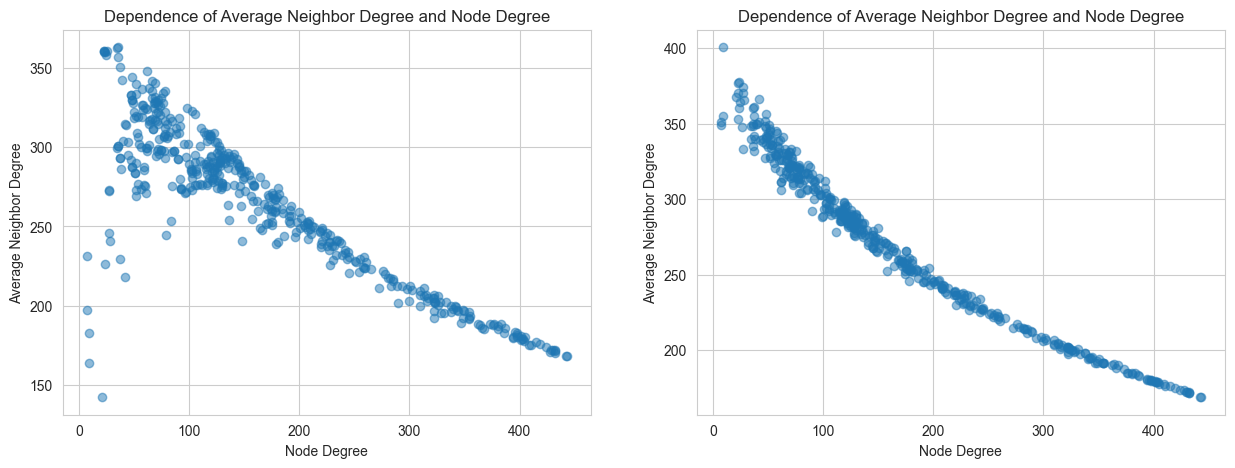

In [12]:
G_trans = read_from_txt('data/reachability.txt')
H_trans = random_switch_graph(G_trans)
plot_everything_together(G_trans, H_trans)

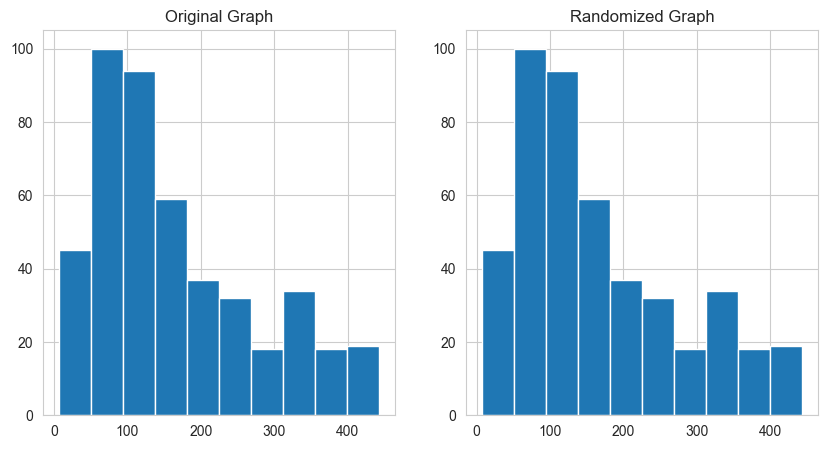

In [66]:
fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
ax[0].set_title("Original Graph")
ax[0].hist(list(dict(G_trans.degree()).values()))
ax[1].set_title("Randomized Graph")
ax[1].hist(list(dict(H_trans.degree()).values()))
plt.show()

In [67]:
assert len(G_trans.nodes()) == len(H_trans.nodes())

# Citation network

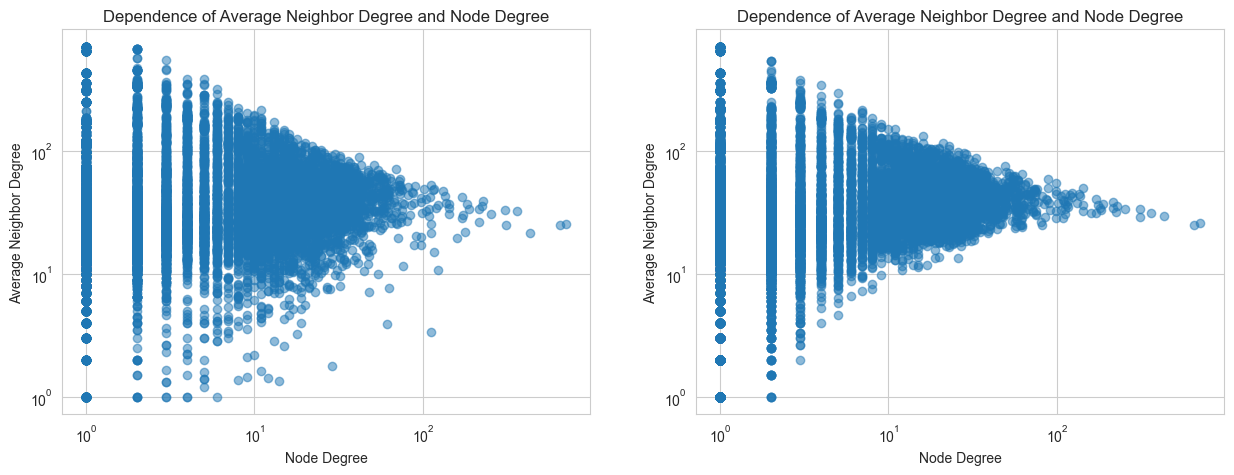

In [22]:
G_citation = read_from_edges('data/cit-DBLP.edges')
G_citation.remove_edges_from(nx.selfloop_edges(G_citation))
H_citation = random_switch_graph(G_citation)
plot_everything_together(G_citation, H_citation, log_scale=True)

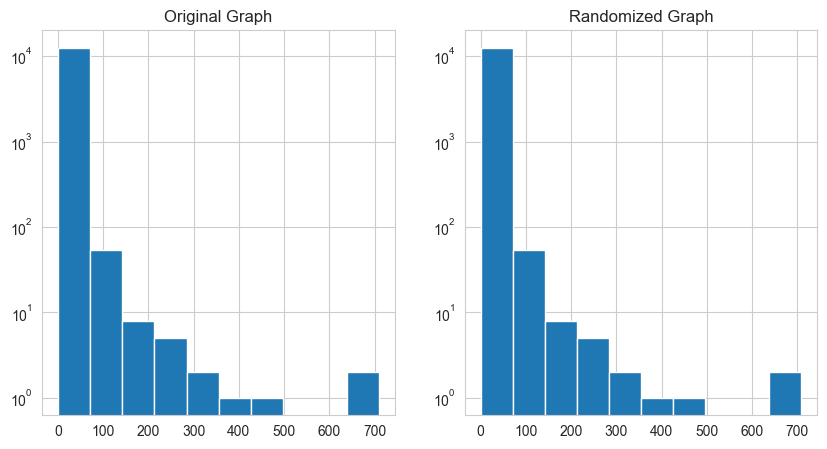

In [74]:
fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
ax[0].set_title("Original Graph")
ax[0].hist(list(dict(G_citation.degree()).values()), log=True)
ax[1].set_title("Randomized Graph")
ax[1].hist(list(dict(H_citation.degree()).values()), log=True)
plt.show()

# Social network

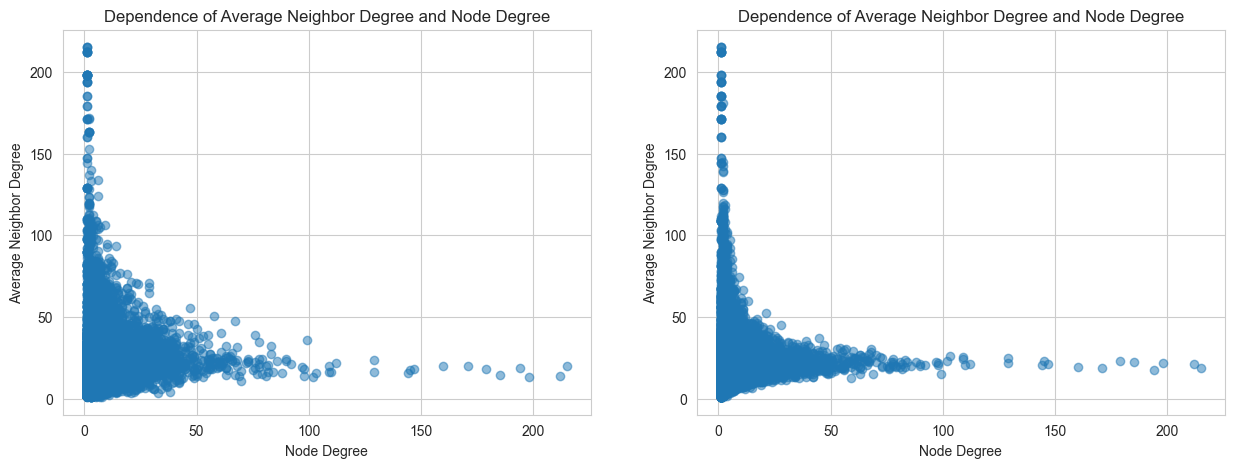

In [21]:
G_social = read_from_txt('data/fb-pages-company.edges', sep=',')
G_social.remove_edges_from(nx.selfloop_edges(G_social))
H_social = random_switch_graph(G_social)
plot_everything_together(G_social, H_social)

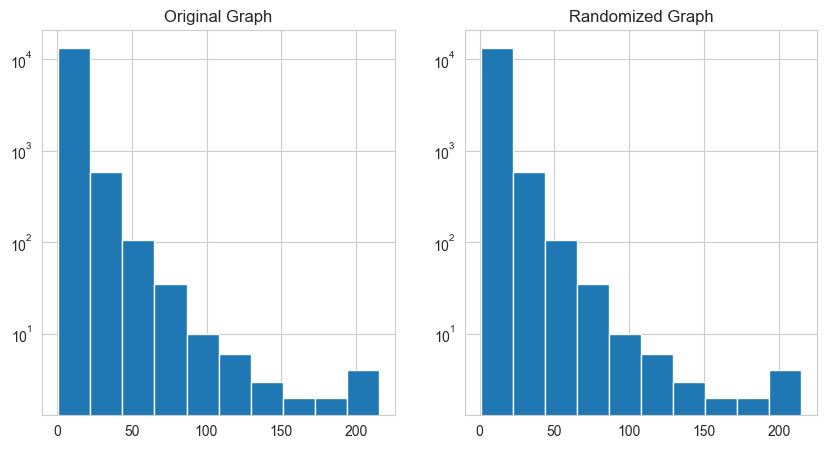

In [80]:
fig, ax = plt.subplots(figsize=(10, 5), ncols=2)
ax[0].set_title("Original Graph")
ax[0].hist(list(dict(G_social.degree()).values()), log=True)
ax[1].set_title("Randomized Graph")
ax[1].hist(list(dict(H_social.degree()).values()), log=True)
plt.show()

# barabasi-albert graph

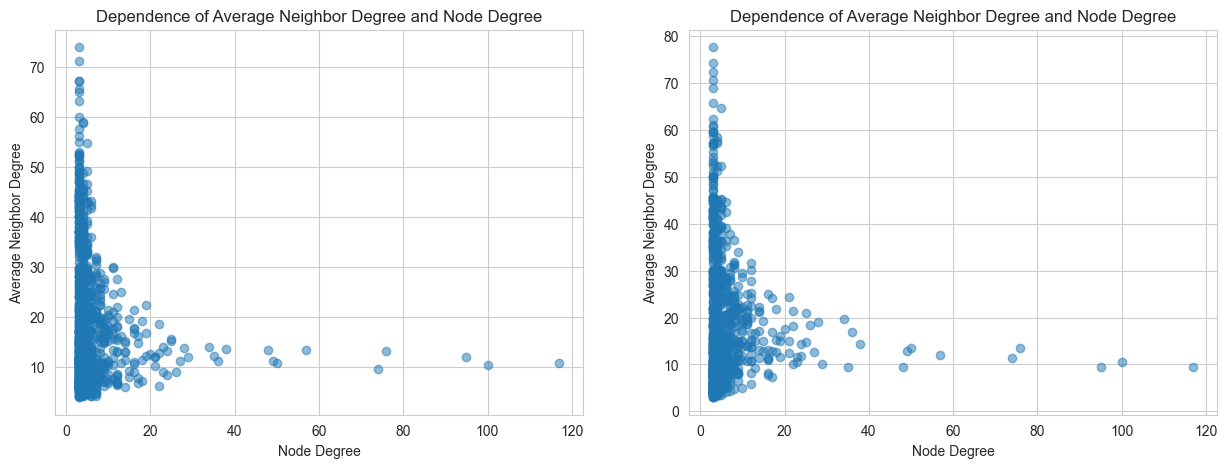

In [20]:
G = nx.barabasi_albert_graph(1000, 3)
H = random_switch_graph(G)
plot_everything_together(G, H)

# Task 6

In [16]:
# transport network (disassortative)
corr_G_trans= nx.degree_assortativity_coefficient(G_trans)
corr_H_trans = nx.degree_pearson_correlation_coefficient(H_trans)
print("Correlation coefficient of network: ", corr_G_trans)
print("Correlation coefficient of randomized network: ", corr_H_trans)

Correlation coefficient of network:  -0.3896650830699481
Correlation coefficient of randomized network:  -0.41546647438519957


In [15]:
# citation network (uncorrelated)
corr_G_citation= nx.degree_pearson_correlation_coefficient(G_citation)
corr_H_citation = nx.degree_pearson_correlation_coefficient(H_citation)
print("Correlation coefficient of network: ", corr_G_citation)
print("Correlation coefficient of randomized network: ", corr_H_citation)

Correlation coefficient of network:  -0.045799445089418994
Correlation coefficient of randomized network:  -0.032462630416225054


In [88]:
# social network (uncorrelated)
corr_G_social= nx.degree_pearson_correlation_coefficient(G_social)
corr_H_social = nx.degree_pearson_correlation_coefficient(H_social)
print("Correlation coefficient of network: ", corr_G_social)
print("Correlation coefficient of randomized network: ", corr_H_social)

Correlation coefficient of network:  0.012620686235366607
Correlation coefficient of randomized network:  -0.013604068398079832


In [89]:
# barabasi-albert network (uncorrelated)
corr_G= nx.degree_pearson_correlation_coefficient(G)
corr_H = nx.degree_pearson_correlation_coefficient(H)
print("Correlation coefficient of network: ", corr_G)
print("Correlation coefficient of randomized network: ", corr_H)

Correlation coefficient of network:  -0.09208918280506631
Correlation coefficient of randomized network:  -0.0792779431704577


# Task 7

In [19]:
import networkx as nx
from tabulate import tabulate
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import powerlaw  # Make sure you have the 'powerlaw' library installed

def calculate_network_statistics(graph):

    # 0. Directed
    directed = nx.is_directed(graph)
    # 1. Node number
    num_nodes = graph.number_of_nodes()
    
    # 2. Edge number
    num_edges = graph.number_of_edges()
    
    # 3. Average degree
    avg_degree = np.mean(list(dict(graph.degree()).values()))
    
    # 4. Power law parameter alpha of network
    degrees = [degree for node, degree in graph.degree()]
    fit = powerlaw.Fit(degrees, discrete=True)
    alpha = fit.alpha
    
    # 5. Correlation coefficient of network
    correlation_coefficient = nx.degree_pearson_correlation_coefficient(graph)
    
    # 6. Mean distance in network
    # for disconnected graphs, calculate efficienty instead
    if nx.is_connected(graph):
        mean_distance = nx.average_shortest_path_length(graph)
        mean_distance_text = 'Mean distance'
    else:
        mean_distance = np.nan
        mean_distance_text = 'Mean Distance (graph disconnected))'
    
    # Create a Pandas DataFrame
    data = {
        'Directed': [directed],
        'Node Number': [num_nodes],
        'Edge Number': [num_edges],
        'Average Degree': [avg_degree],
        'Power Law Alpha': [alpha],
        mean_distance_text: [mean_distance],
        'Correlation Coefficient': [correlation_coefficient]
    }
    
    df = pd.DataFrame(data)
    
    table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)
    
    return table


In [25]:
print(calculate_network_statistics(G_trans))

Calculating best minimal value for power law fit
+----------+-------------+-------------+--------------------+--------------------+--------------------+-------------------------+
| Directed | Node Number | Edge Number |   Average Degree   |  Power Law Alpha   |   Mean distance    | Correlation Coefficient |
+----------+-------------+-------------+--------------------+--------------------+--------------------+-------------------------+
|  False   |     456     |    37947    | 166.43421052631578 | 2.6534499120833352 | 1.6357046462309621 |  -0.38966508306994474   |
+----------+-------------+-------------+--------------------+--------------------+--------------------+-------------------------+


In [23]:
print(calculate_network_statistics(G_citation))

Calculating best minimal value for power law fit
+----------+-------------+-------------+------------------+--------------------+-------------------------------------+-------------------------+
| Directed | Node Number | Edge Number |  Average Degree  |  Power Law Alpha   | Mean Distance (graph disconnected)) | Correlation Coefficient |
+----------+-------------+-------------+------------------+--------------------+-------------------------------------+-------------------------+
|  False   |    12594    |    49622    | 7.88026044148007 | 3.3528246481504334 |                 nan                 |  -0.04579944508942192   |
+----------+-------------+-------------+------------------+--------------------+-------------------------------------+-------------------------+


In [24]:
print(calculate_network_statistics(G_social))

Calculating best minimal value for power law fit
+----------+-------------+-------------+-------------------+-------------------+-------------------------------------+-------------------------+
| Directed | Node Number | Edge Number |  Average Degree   |  Power Law Alpha  | Mean Distance (graph disconnected)) | Correlation Coefficient |
+----------+-------------+-------------+-------------------+-------------------+-------------------------------------+-------------------------+
|  False   |    14115    |    52127    | 7.386043216436415 | 3.405730467393978 |                 nan                 |  0.012620686235366472   |
+----------+-------------+-------------+-------------------+-------------------+-------------------------------------+-------------------------+


In [26]:
print(calculate_network_statistics(G))


Calculating best minimal value for power law fit
+----------+-------------+-------------+----------------+-------------------+--------------------+-------------------------+
| Directed | Node Number | Edge Number | Average Degree |  Power Law Alpha  |   Mean distance    | Correlation Coefficient |
+----------+-------------+-------------+----------------+-------------------+--------------------+-------------------------+
|  False   |    1000     |    2991     |     5.982      | 2.702304579311676 | 3.3815815815815817 |   -0.0953391051536578   |
+----------+-------------+-------------+----------------+-------------------+--------------------+-------------------------+
